In [470]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron, LogisticRegression, SGDClassifier
from matplotlib.colors import ListedColormap

In [381]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [382]:
df2 = iris.target
df['Species'] = df2
df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [663]:
class AdalineSGD():
    
    def __init__(self, eta=0.01, n_iter=100, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self.cost_ = []
        self._initialize_weights(X.shape[1])
        for i in range(self.n_iter):
            if self.shuffle:
                X, y=self._shuffle(X,y)
                cost = []
                for xi, target in zip(X, y):
                   cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost) / len(y)
                self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, x_i, y_i):
        self.update_weights(x_i, y_i)
        return self
    
    def _shuffle(self, X, y):
        s = self.abc.permutation(len(y))
        return X[s], y[s]
        
    def _initialize_weights(self, m):
        self.abc = np.random.RandomState(self.random_state)
        self.w_ = self.abc.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error) 
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2 
        return cost 
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return np.where(self.net_input(X)>= 0.0, 1, -1)

In [678]:
class OnevRestAda:
    def __init__(self, base_model_class, **params):
       
        self.base_model_class = base_model_class
        self.params = params  # Store parameters for base model
        self.models = []

    def fit(self, X, y):
        
        self.classes_ = np.unique(y)
        self.models = []
        
        for class_label in self.classes_:
            y_ova = np.where(y == class_label, 1, 0)
            
            # Initialize the model for this class with the passed arguments
            model = self.base_model_class(**self.params)
            model.fit(X, y_ova)  # Train the model
            self.models.append(model)  # Save the model for this class

    def activation(self, X):
        return X

    def predict(self, X):
        all = np.zeros((X.shape[0], len(self.classes_)))

        for idx, model in enumerate(self.models):
            decision_output = X.dot(model.w_[1:]) + model.w_[0]   

            value = self.activation(decision_output)
            print(value)
            all[:, idx] = value

        # Assign each test sample to the class with the highest probability
        return np.argmax(all, axis=1)
        


In [741]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Use sepal length and petal width
y = iris.target
y_ova = np.where(y == 0, 1, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, test_size=0.3, random_state=42, stratify = y_ova)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model = AdalineSGD()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


In [681]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Use sepal length and petal width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the training and testing datasets
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize OvA with LogisticSGD
ova_classifier_ada = OnevRestAda(AdalineSGD, eta=0.01, n_iter=300)

# Train the OvA model
ova_classifier_ada.fit(X_train_std, y_train)

# Predict on the test set
final_predictions = ova_classifier_ada.predict(X_test_std)
print('Prediction: ', final_predictions)
# Calculate and print overall classification accuracy on the test set
overall_accuracy = accuracy_score(y_test, final_predictions)
print('True label: ', y_test)
print(f"Overall classification accuracy for One Vs ALL Adaline: {overall_accuracy:.2f}")

[ 0.01772862  0.22797772  0.17487549  0.12069336  0.01124919 -0.31060388
  0.27892014  0.38782435  0.87438363 -0.25534185  0.87654344  0.86898411
  0.01448891  0.013409    0.87330372 -0.25912151  0.43822682  0.87438363
  0.71021738  0.82182135  0.2826998   0.87222382  0.23067748 -0.20331952
  0.01070924  0.17541544  0.17001592  0.43876677  0.17109583  0.87222382
  0.22797772 -0.20385947  0.1190735   0.87222382 -0.04131308  0.81804169
  0.86898411  0.87060396  0.6554953   0.06867104  0.28000004  0.87006401
  0.0589519  -0.09495526  0.28485961]
[0.35386278 0.34712093 0.3512048  0.3600855  0.38264374 0.42153747
 0.3526307  0.33247088 0.25734139 0.40785994 0.24774774 0.28132552
 0.36825326 0.37305008 0.26213821 0.42464883 0.34037907 0.25734139
 0.29117874 0.25902685 0.33584181 0.26693504 0.33512886 0.40857289
 0.38504215 0.34880639 0.37279052 0.33798066 0.36799369 0.26693504
 0.34712093 0.41097131 0.36728074 0.26693504 0.3843292  0.27581574
 0.28132552 0.27413028 0.30245785 0.35937255 0.34

TypeError: plot_decision_regions() got an unexpected keyword argument 'clf'

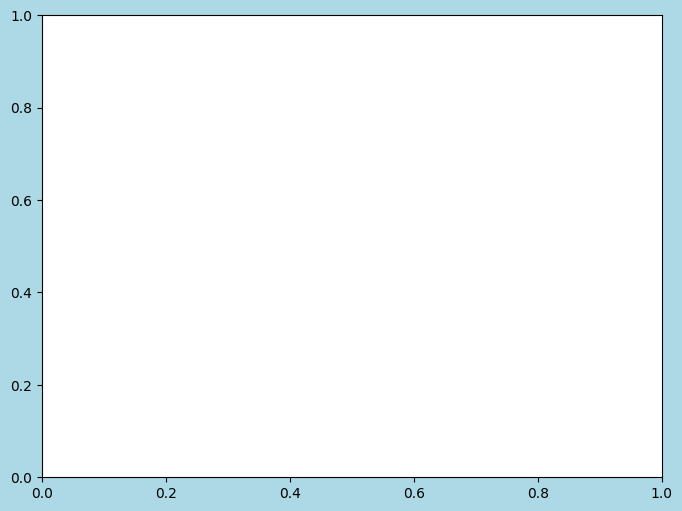

In [770]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

# Apply One-Versus-All (OvA) strategy
y_ova = np.where(y == 0, 1, -1)  # Setosa is +1, others are -1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, random_state=42, stratify=y_ova)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Adaline model
model = AdalineSGD()
model.fit(X_train_std, y_train)

# Plotting decision regions
plt.figure(figsize=(8, 6), facecolor='lightblue')
ax = plt.gca()  
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
# Plot formatting
plt.title('Binary Classification: Setosa vs Rest', fontsize=16)
plt.xlabel('sepal length [standardized]', fontsize=12)
plt.ylabel('petal width [standardized]', fontsize=12)
plt.legend(loc='upper left')
plt.show()

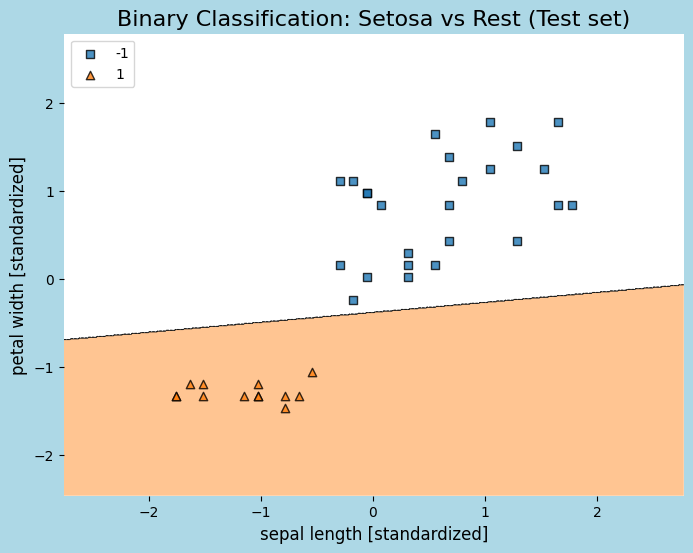

In [724]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

# Apply One-Versus-All (OvA) strategy
y_ova = np.where(y == 0, 1, -1)  # Setosa is +1, others are -1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, random_state=42, stratify=y_ova)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Adaline model
model = AdalineSGD()
model.fit(X_train_std, y_train)

# Plotting decision regions
plt.figure(figsize=(8, 6), facecolor='lightblue')
ax = plt.gca()  
plot_decision_regions(X_test_std, y_test, clf=model, legend=2)
# Plot formatting
plt.title('Binary Classification: Setosa vs Rest (Test set)', fontsize=16)
plt.xlabel('sepal length [standardized]', fontsize=12)
plt.ylabel('petal width [standardized]', fontsize=12)
plt.legend(loc='upper left')
plt.show()

Overall accuracy: 0.62


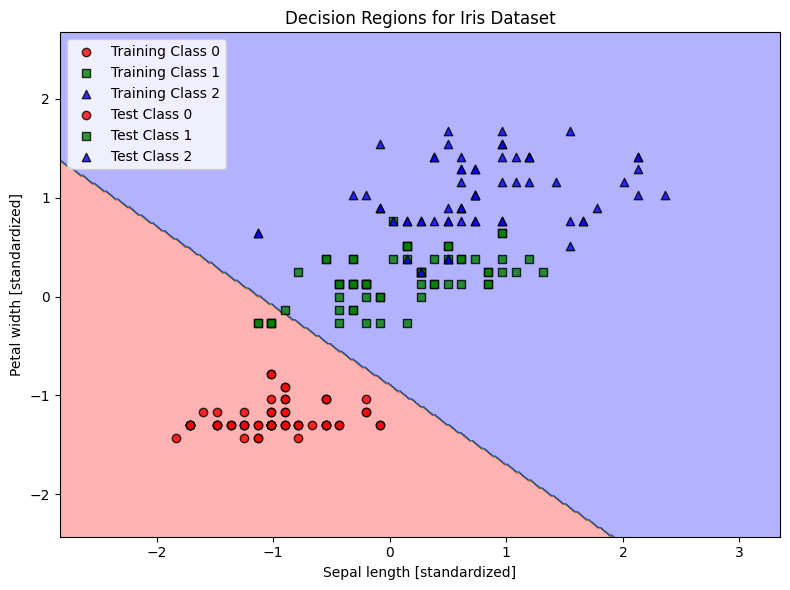

In [769]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 3]]  # Use Sepal length and Petal width
y = iris.target  # Use all three classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train a classifier (e.g., Stochastic Gradient Descent classifier)
model = LogisticRegressionSGD(eta=0.001, n_iter=200, random_state=42)
model.fit(X_train_std, y_train)

# Predict the test data
y_pred = model.predict(X_test_std)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {accuracy:.2f}")

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02, test_data=None, test_labels=None):
    markers = ('o', 's', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Training Class {cl}', edgecolor='black')

    # Plot test points if provided
    if test_data is not None and test_labels is not None:
        for idx, cl in enumerate(np.unique(test_labels)):
            plt.scatter(x=test_data[test_labels == cl, 0], y=test_data[test_labels == cl, 1],
                        alpha=0.8, c=colors[idx], marker=markers[idx], edgecolor='black',
                        label=f'Test Class {cl}', facecolor='none')

# Combine training and test sets for decision boundary
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined_std, y_combined, classifier=model,
                      test_data=X_test_std, test_labels=y_test)

# Add labels and legend
plt.title("Decision Regions for Iris Dataset")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


Training for class 0 vs rest
Accuracy score for class[class_label] vs rest: 1.0
Training for class 1 vs rest
Accuracy score for class[class_label] vs rest: 0.6578947368421053
Training for class 2 vs rest
Accuracy score for class[class_label] vs rest: 0.8421052631578947


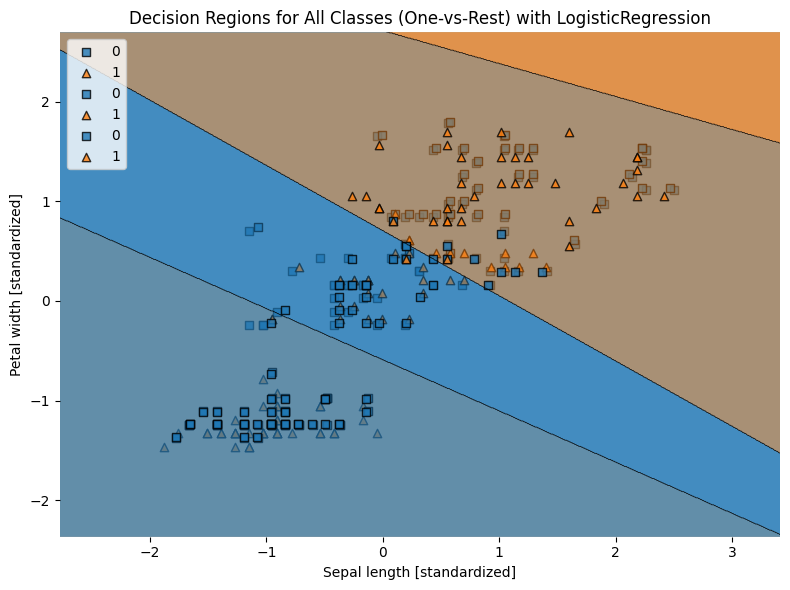

In [754]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

plt.figure(figsize=(8, 6))

# Loop through each class to plot decision regions
for class_label in np.unique(Y):
    print(f"Training for class {class_label} vs rest")

    # Set up one-vs-all labels: current class as positive (1), others as negative (0)
    y_ova = np.where(Y == class_label, 1, 0)  # Set class_label as 1, others as 0

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y_ova, random_state=42, stratify=y_ova)
    
    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # Train the model
    model = LogisticRegressionSGD(eta=0.001, n_iter=100)  # Adjust eta (learning rate) and n_iter (iterations) for better learning
    model.fit(X_train_std, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    
    # Print the accuracy score for each class
    print(f'Accuracy score for class[class_label] vs rest: {acc}')
    
    # Plot decision regions for the current class
    plot_decision_regions(X_train_std, y_train, clf=model, legend=2)

# Add title, labels, and legend for the combined plot
plt.title("Decision Regions for All Classes (One-vs-Rest) with LogisticRegression")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal width [standardized]")

# Create custom legend to label each class
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

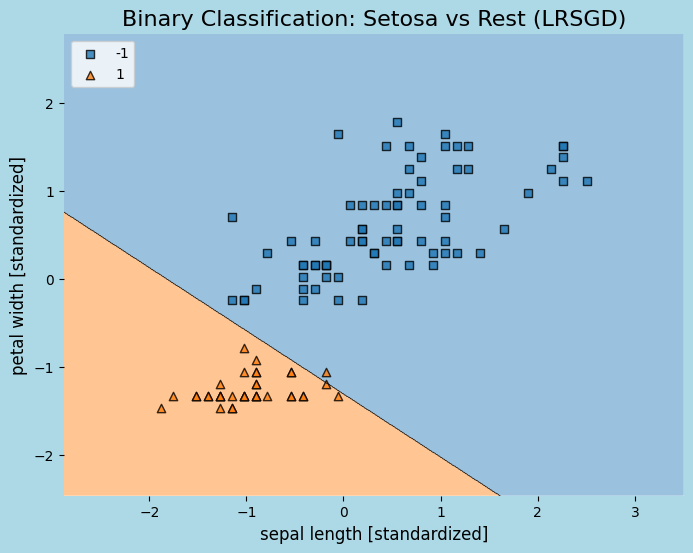

In [744]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

# Apply One-Versus-All (OvA) strategy
y_ova = np.where(y == 0, 1, -1)  # Setosa is +1, others are -1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, random_state=42, stratify=y_ova)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Adaline model
model = LogisticRegressionSGD()
model.fit(X_train_std, y_train)

# Plotting decision regions
plt.figure(figsize=(8, 6), facecolor='lightblue')
ax = plt.gca()  
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
# Plot formatting
plt.title('Binary Classification: Setosa vs Rest (LRSGD)', fontsize=16)
plt.xlabel('sepal length [standardized]', fontsize=12)
plt.ylabel('petal width [standardized]', fontsize=12)
plt.legend(loc='upper left')
plt.show()

In [565]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Use sepal length and petal width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the training and testing datasets
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize models and an array to store predictions for the test set
models = []
all = np.zeros((X_test_std.shape[0], len(np.unique(y))))  # Store predictions for all classes

# Train an Adaline model for each class (One-vs-Rest)
for class_label in np.unique(y):  # Loop over each class
    # Create binary labels for one-vs-rest classification
    y_train_ova = np.where(y_train == class_label, 1, -1)
    
    # Train Adaline model
    model = AdalineSGD()
    model.fit(X_train_std, y_train_ova)  # Train on the standardized training dataset
    models.append(model)  # Save model
    
    # Predict on the test set
    all[:, class_label] = model.predict(X_test_std)  # Store predictions for this class

# Assign each test sample to the class with the highest positive score
final_predictions = np.argmax(all, axis=1)

# Calculate and print overall classification accuracy on the test set
overall_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall classification accuracy for Adaline on the test set: {overall_accuracy:.2f}")

Overall classification accuracy for Adaline on the test set: 0.62


In [733]:
class LogisticRegressionSGD():
    def __init__(self, eta=0.001, n_iter=100, shuffle=True, random_state=None):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of iterations (epochs)
        self.shuffle = shuffle  # Shuffle data after each epoch
        self.random_state = random_state  # Random seed for reproducibility
        self.w_initialized = False  # Weight initialization flag

    def fit(self, X, y):
        """Fit the model to the training data."""
        self.cost_ = []
        self._initialize_weights(X.shape[1])  # Initialize weights
        
        for i in range(self.n_iter):  # Iterate over epochs
            if self.shuffle:  # Shuffle data if specified
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):  # Iterate over individual samples
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)  # Average cost over epoch
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        for xi, target in zip(X, y):
            self._update_weights(xi, target)
        return self

    def _shuffle(self, X, y):
        
        s = self.abc.permutation(len(y))
        return X[s], y[s]

    def _initialize_weights(self, m):
        
        self.abc = np.random.RandomState(self.random_state)
        self.w_ = self.abc.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        
        output = self.activation_function(self.net_input(xi))  # Sigmoid output
        error = target - output
        self.w_[1:] += self.eta * xi * error  # Update weights for features
        self.w_[0] += self.eta * error  # Update bias term
        cost = -target * np.log(output) - (1 - target) * np.log(1 - output)  # Log-loss
        return cost

    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation_function(self, z):
        """Compute the sigmoid activation function."""
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Return class label after applying the sigmoid activation."""
        return np.where(self.activation_function(self.net_input(X)) >= 0.5, 1, 0)


In [734]:
print(np.unique(y))

[0 1 2]


In [735]:
class OnevRest:
    def __init__(self, base_model_class, **params):
       
        self.base_model_class = base_model_class
        self.params = params  # Store parameters for base model
        self.models = []

    def fit(self, X, y):
        
        self.classes_ = np.unique(y)
        self.models = []
        
        for class_label in self.classes_:
            y_ova = np.where(y == class_label, 1, 0)
            
            # Initialize the model for this class with the passed arguments
            model = self.base_model_class(**self.params)
            model.fit(X, y_ova)  # Train the model
            self.models.append(model)  # Save the model for this class
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        all_probabilities = np.zeros((X.shape[0], len(self.classes_)))

        for idx, model in enumerate(self.models):
            decision_output = X.dot(model.w_[1:]) + model.w_[0]  # Calculate the z for all the samples 
            
            # Apply the sigmoid function to get probabilities
            probabilities = self._sigmoid(decision_output)
            
            
            # Store probabilities for this class
            all_probabilities[:, idx] = probabilities

        # Assign each test sample to the class with the highest probability
        return np.argmax(all_probabilities, axis=1)
        

In [736]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Use sepal length and petal width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the training and testing datasets
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize OvA with LogisticSGD
ova_classifier = OnevRest(LogisticRegressionSGD, eta=0.01, n_iter=300)

# Train the OvA model
ova_classifier.fit(X_train_std, y_train)

# Predict on the test set
final_predictions = ova_classifier.predict(X_test_std)

overall_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall classification accuracy for One Vs ALL LogisticRegressionSGD: {overall_accuracy:.2f}")

Overall classification accuracy for One Vs ALL LogisticRegressionSGD: 0.89


Overall classification accuracy for OnevRest LogisticSGD: 0.89


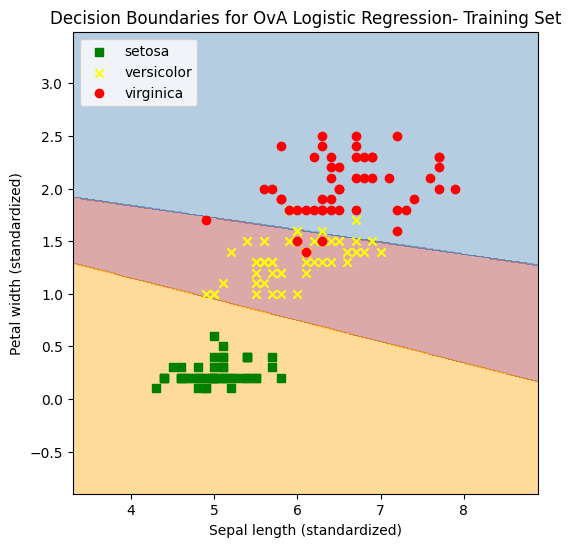

In [737]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # sepal length and petal width
y = iris.target

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, sc, resolution=0.01):
    # Create a meshgrid
    markers = ('s', 'x', 'o', '^', 'v')  # List of markers for each class
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Standardize meshgrid points as we did for the training data
    X_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_grid_std = sc.transform(X_grid)  # Apply the same scaling to the meshgrid
    
    # Create a color map for the regions
    cmap = ListedColormap(['#FFA500','#A52A2A', '#4682B4']) 
    
    # Get the predictions for all the classes
    Z = model.predict(X_grid_std)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries for each class model
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot class samples with different markers
    for i, (color, marker) in zip(range(3), [('green', 's'), ('yellow', 'x'), ('red', 'o')]):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', color=color, marker=marker)

# Initialize the plot
plt.figure(figsize=(6, 6))

# Initialize OvA with LogisticSGD
ova_classifier = OnevRest(LogisticRegressionSGD, eta=0.01, n_iter=300)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the OvA model
ova_classifier.fit(X_train_std, y_train)

# Predict on the test set
final_predictions = ova_classifier.predict(X_test_std)

overall_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall classification accuracy for OnevRest LogisticSGD: {overall_accuracy:.2f}")

# Plot decision boundaries for all classes on a single plot
plot_decision_boundaries(X, y, ova_classifier, sc)

# Finalize the plot
plt.title('Decision Boundaries for OvA Logistic Regression')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left', labels=iris.target_names)
plt.show()

Overall classification accuracy for OnevRest LogisticSGD on the test set: 0.89


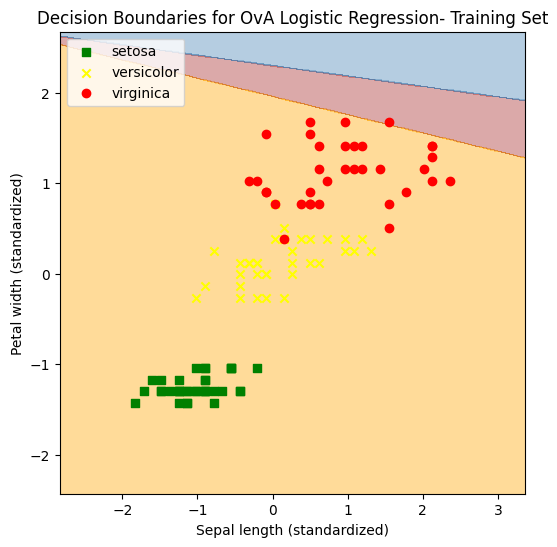

In [732]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # sepal length and petal width
y = iris.target

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, sc, resolution=0.01):
    # Create a meshgrid
    markers = ('s', 'x', 'o', '^', 'v')  # List of markers for each class
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Standardize meshgrid points as we did for the training data
    X_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_grid_std = sc.transform(X_grid)  # Apply the same scaling to the meshgrid
    
    # Create a color map for the regions
    cmap = ListedColormap(['#FFA500','#A52A2A', '#4682B4']) 
    
    # Get the predictions for all the classes
    Z = model.predict(X_grid_std)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries for each class model
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot class samples with different markers
    for i, (color, marker) in zip(range(3), [('green', 's'), ('yellow', 'x'), ('red', 'o')]):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', color=color, marker=marker)

# Initialize the plot
plt.figure(figsize=(6, 6))

# Initialize OvA with LogisticSGD
ova_classifier = OnevRest(LogisticRegressionSGD, eta=0.01, n_iter=300)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the OvA model
ova_classifier.fit(X_train_std, y_train)

# Predict on the test set
final_predictions = ova_classifier.predict(X_test_std)

overall_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall classification accuracy for OnevRest LogisticSGD on the test set: {overall_accuracy:.2f}")

# Plot decision boundaries for all classes on a single plot
plot_decision_boundaries(X_train_std, y_train, ova_classifier, sc)

# Finalize the plot
plt.title('Decision Boundaries for OvA Logistic Regression- Training Set')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left', labels=iris.target_names)
plt.show()

[2 0 2 2 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 0 2 0 0
 0 0 2 0 0 0 2 0]
Overall classification accuracy for Adaline: 0.62


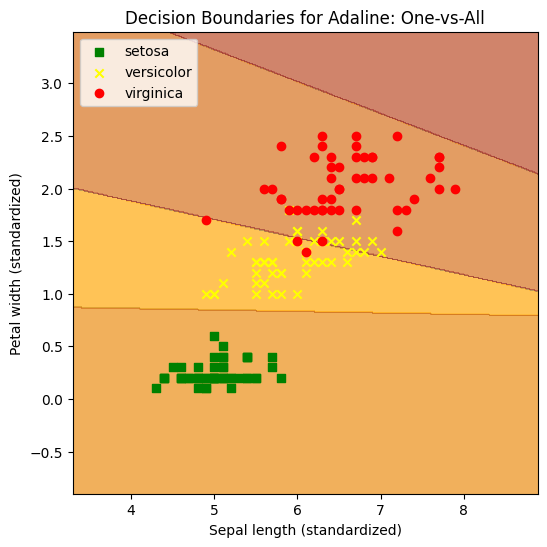

In [625]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # sepal length and petal width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the training and testing datasets
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, models, sc, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')  # List of markers for each class
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Standardize meshgrid points as we did for the training data
    X_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_grid_std = sc.transform(X_grid)  # Apply the same scaling to the meshgrid
    
    # Create a color map for the regions
    cmap = ListedColormap(['#FFA500','#808080','#A52A2A' ])
    
    # Plot decision boundaries for each class model
    for model in models:
        Z = model.predict(X_grid_std)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Plot class samples with different markers
    for i, (color, marker) in zip(range(3), [('green', 's'), ('yellow', 'x'), ('red', 'o')]):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', color=color, marker=marker)

# Initialize the plot
plt.figure(figsize=(6, 6))

models = []
all_predictions = np.zeros((X_test_std.shape[0], len(np.unique(y))))  # Store predictions for all classes

# Train an Adaline model for each class (One-vs-Rest)
for class_label in np.unique(y):  # Loop over each class
    y_train_ova = np.where(y_train == class_label, 1, -1)
    
    # Train Adaline model
    model = AdalineSGD(eta=0.1, n_iter=700)  # Assuming AdalineSGD is your custom model
    model.fit(X_train_std, y_train_ova)  # Train on the standardized training dataset
    models.append(model)  # Save model
    
    # Predict on the test set
    all_predictions[:, class_label] = model.predict(X_test_std)  # Store predictions for this class

# Assign each test sample to the class with the highest positive score

final_predictions = np.argmax(all_predictions, axis=1)
print(final_predictions)
# Calculate and print overall classification accuracy on the test set
overall_accuracy = accuracy_score(y_test, final_predictions)
print(f"Overall classification accuracy for Adaline: {overall_accuracy:.2f}")

# Plot decision boundaries for all classes on a single plot
plot_decision_boundaries(X, y, models, sc)

# Finalize the plot
plt.title('Decision Boundaries for Adaline: One-vs-All')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left', labels=iris.target_names)
plt.show()

In [ ]:
for class_label in np.unique(y):  # Iterate over each class

    # Set up one-vs-all labels: For class_label as positive, others as negative
    y_ova = np.where(y == class_label, 1, -1)

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y_ova, random_state=42, stratify=y_ova)

    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # Train the model
    model = AdalineSGD()
    model.fit(X_train_std, y_train)

    # Add the trained model to the list
    models.append(model)

    # Evaluate the model
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    

Accuracy score for Perceptron: 0.89


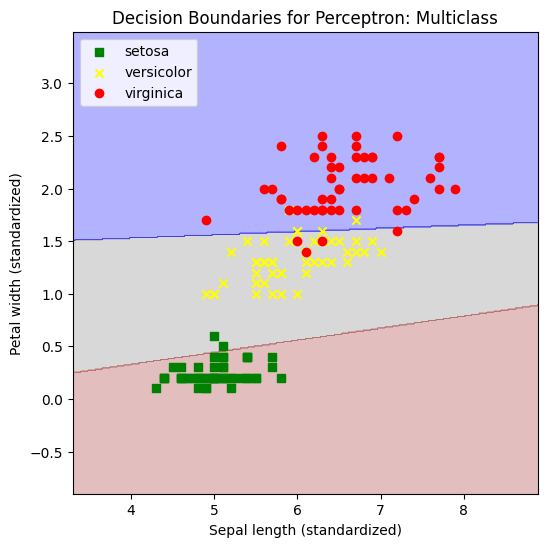

In [536]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # sepal length and petal width
y = iris.target

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, sc, resolution=0.01):
    # Create a meshgrid
    markers = ('s', 'x', 'o', '^', 'v')  # List of markers for each class
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Standardize meshgrid points as we did for the training data
    X_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_grid_std = sc.transform(X_grid)  # Apply the same scaling to the meshgrid
    
    # Create a color map for the regions
    cmap = ListedColormap(['#A52A2A', '#808080', '#0000FF'])
    
    # Plot decision boundaries for each class model
    Z = model.predict(X_grid_std)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Plot class samples with different markers
    for i, (color, marker) in zip(range(3), [('green', 's'), ('yellow', 'x'), ('red', 'o')]):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', color=color, marker=marker)

# Initialize the plot
plt.figure(figsize=(6, 6))

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the Perceptron model with multiclass classification (One-vs-Rest by default)
model = Perceptron(eta0=0.01, max_iter=300, random_state=42)
model.fit(X_train_std, y_train)

# Evaluate the model
y_pred = model.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)

# Print accuracy for the multiclass model
print(f'Accuracy score for Perceptron: {acc:.2f}')

# Plot decision boundaries
plot_decision_boundaries(X, y, model, sc)

# Finalize the plot
plt.title('Decision Boundaries for Perceptron: Multiclass')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left', labels=iris.target_names)
plt.show()

C:\Users\ERC\AppData\Local\Temp\ipykernel_10624\3641011129.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx_train, yy_train, z_train, alpha=0.3, cmap=ListedColormap(['blue', 'orange']), label='Training Region')
C:\Users\ERC\AppData\Local\Temp\ipykernel_10624\3641011129.py:24: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx_test, yy_test, z_test, alpha=0.2, cmap=ListedColormap(['cyan', 'yellow']), label='Testing Region')


NameError: name 'y_train_combined' is not defined

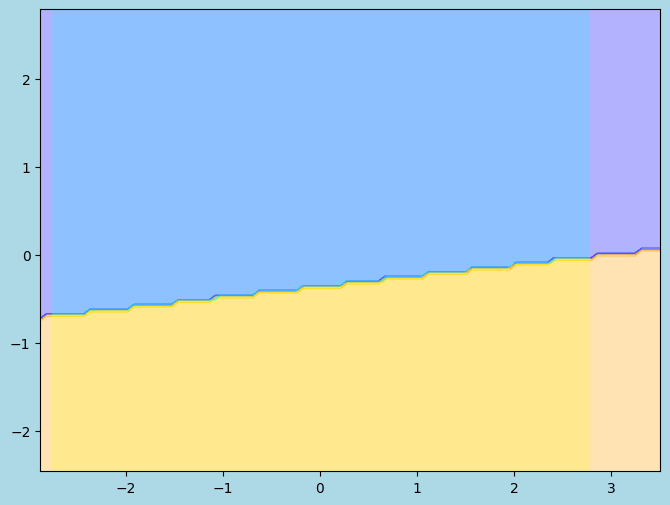

In [743]:
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8, 6), facecolor='lightblue')

# Create meshgrid for training data
xx_train, yy_train = np.meshgrid(
    np.linspace(X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1, 100),
    np.linspace(X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1, 100)
)
z_train = model.predict(np.array([xx_train.ravel(), yy_train.ravel()]).T)
z_train = z_train.reshape(xx_train.shape)

# Create meshgrid for testing data
xx_test, yy_test = np.meshgrid(
    np.linspace(X_test_std[:, 0].min() - 1, X_test_std[:, 0].max() + 1, 100),
    np.linspace(X_test_std[:, 1].min() - 1, X_test_std[:, 1].max() + 1, 100)
)
z_test = model.predict(np.array([xx_test.ravel(), yy_test.ravel()]).T)
z_test = z_test.reshape(xx_test.shape)

# Plot decision regions for training
plt.contourf(xx_train, yy_train, z_train, alpha=0.3, cmap=ListedColormap(['blue', 'orange']), label='Training Region')

# Overlay decision regions for testing with a different style
plt.contourf(xx_test, yy_test, z_test, alpha=0.2, cmap=ListedColormap(['cyan', 'yellow']), label='Testing Region')

# Scatter training data points
plt.scatter(
    X_train_std[y_train_combined == 0, 0], X_train_std[y_train_combined == 0, 1],
    color='blue', marker='o', label='Setosa (Train)'
)
plt.scatter(
    X_train_std[y_train_combined == 1, 0], X_train_std[y_train_combined == 1, 1],
    color='orange', marker='^', label='Versicolor + Virginica (Train)'
)

# Scatter testing data points
plt.scatter(
    X_test_std[y_test_combined == 0, 0], X_test_std[y_test_combined == 0, 1],
    color='cyan', marker='o', label='Setosa (Test)'
)
plt.scatter(
    X_test_std[y_test_combined == 1, 0], X_test_std[y_test_combined == 1, 1],
    color='yellow', marker='^', label='Versicolor + Virginica (Test)'
)

# Add titles and labels
plt.title('Training and Testing Decision Regions', fontsize=16)
plt.xlabel('Feature 1 (Standardized)', fontsize=14)
plt.ylabel('Feature 2 (Standardized)', fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Using petal length and petal width
y = iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Standardize the features using the same scaler for train and test sets
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
# Train the One-vs-All (OvA) Logistic Regression using SGD
ova_classifier = OnevRest(LogisticRegressionSGD)
ova_classifier.fit(X_train_std, y_train)
# Calculate overall accuracy
y_train_pred = ova_classifier.predict(X_train_std)
y_test_pred = ova_classifier.predict(X_test_std)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, resolution=0.01, title="Decision Boundaries"):
   # Create a grid for plotting
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
   # Predict over the grid
   Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   # Plot decision surface
   plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.Paired)
   # Plot training points
   for idx, class_label in enumerate(np.unique(y)):
       plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                   label=f"Class {class_label}", edgecolor='k')
   plt.title(title)
   plt.xlabel("Feature 1 (Standardized)")
   plt.ylabel("Feature 2 (Standardized)")
   plt.legend(loc='upper left')
   plt.show()
# Plot decision boundaries using the training set
plot_decision_boundaries(X_train_std, y_train, ova_classifier, title="Decision Boundaries for OvA Logistic Regression (SGD)")
# Plot decision boundaries using the test set
plot_decision_boundaries(X_test_std, y_test, ova_classifier, title="Test Set Decision Boundaries for OvA Logistic Regression (SGD)")

NameError: name 'load_iris' is not defined

In [ ]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

# Apply One-Versus-All (OvA) strategy
y_ova = np.where(y == 0, 1, -1)  # Setosa is +1, others are -1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, test_size = 0.3, random_state=42, stratify=y_ova)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Adaline model
model = LogisticRegressionSGD(eta=0.001, n_iter=300)
model.fit(X_train_std, y_train)

# Plotting decision regions
plt.figure(figsize=(8, 6), facecolor='lightblue')
ax = plt.gca()  
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
# Plot formatting
plt.title('Binary Classification: Setosa vs Rest (LRSGD)', fontsize=16)
plt.xlabel('sepal length [standardized]', fontsize=12)
plt.ylabel('petal width [standardized]', fontsize=12)
plt.legend(loc='upper left')
plt.show()

In [ ]:
iris = load_iris()
X = iris.data[:, [0, 3]]  # Sepal length and petal width
y = iris.target

# Apply One-Versus-All (OvA) strategy
y_ova = np.where(y == 0, 1, -1)  # Setosa is +1, others are -1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_ova, test_size=0.3, random_state=42, stratify=y_ova)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train Adaline model
model = SGDClassifier(random_state=42)
model.fit(X_train_std, y_train)

# Plotting decision regions
plt.figure(figsize=(8, 6), facecolor='lightblue')
ax = plt.gca()  
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
# Plot formatting
plt.title('Binary Classification: Versicolor vs Rest (ADASGD)', fontsize=16)
plt.xlabel('sepal length [standardized]', fontsize=12)
plt.ylabel('petal width [standardized]', fontsize=12)
plt.legend(loc='upper left')
plt.show()